In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Sample Dataset (Replace with your actual dataset)
data = pd.DataFrame({
    'class': ['First', 'Third', 'Third', 'First', 'First', 'Third'],
    'sex': ['female', 'female', 'female', 'male', 'male', 'male'],
    'age': [38, 26, 18, 28, 28, 21],
    'target': [1, 0, 0, 1, 1, 0]  # Example labels (Survived: 1, Not Survived: 0)
})

In [97]:
data

,class,sex,age,target
0,First,female,38,1
1,Third,female,26,0
2,Third,female,18,0
3,First,male,28,1
4,First,male,28,1
5,Third,male,21,0


In [98]:
# Splitting into train/test sets
X = data[['class', 'sex', 'age']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
X_test
print(X_train['sex'].to_numpy().reshape(-1,1))

[['male']
 ['female']
 ['male']
 ['male']]


True  +  class
Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('encoder',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('classifier', DecisionTreeClassifier(max_depth=1))])
type object ['First' 'Third']
str:  ['First' 'Third']
True  +  sex
Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('encoder',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('classifier', DecisionTreeClassifier(max_depth=1))])
type object ['female' 'male']
str:  ['female' 'male']


IndexError: list index out of range

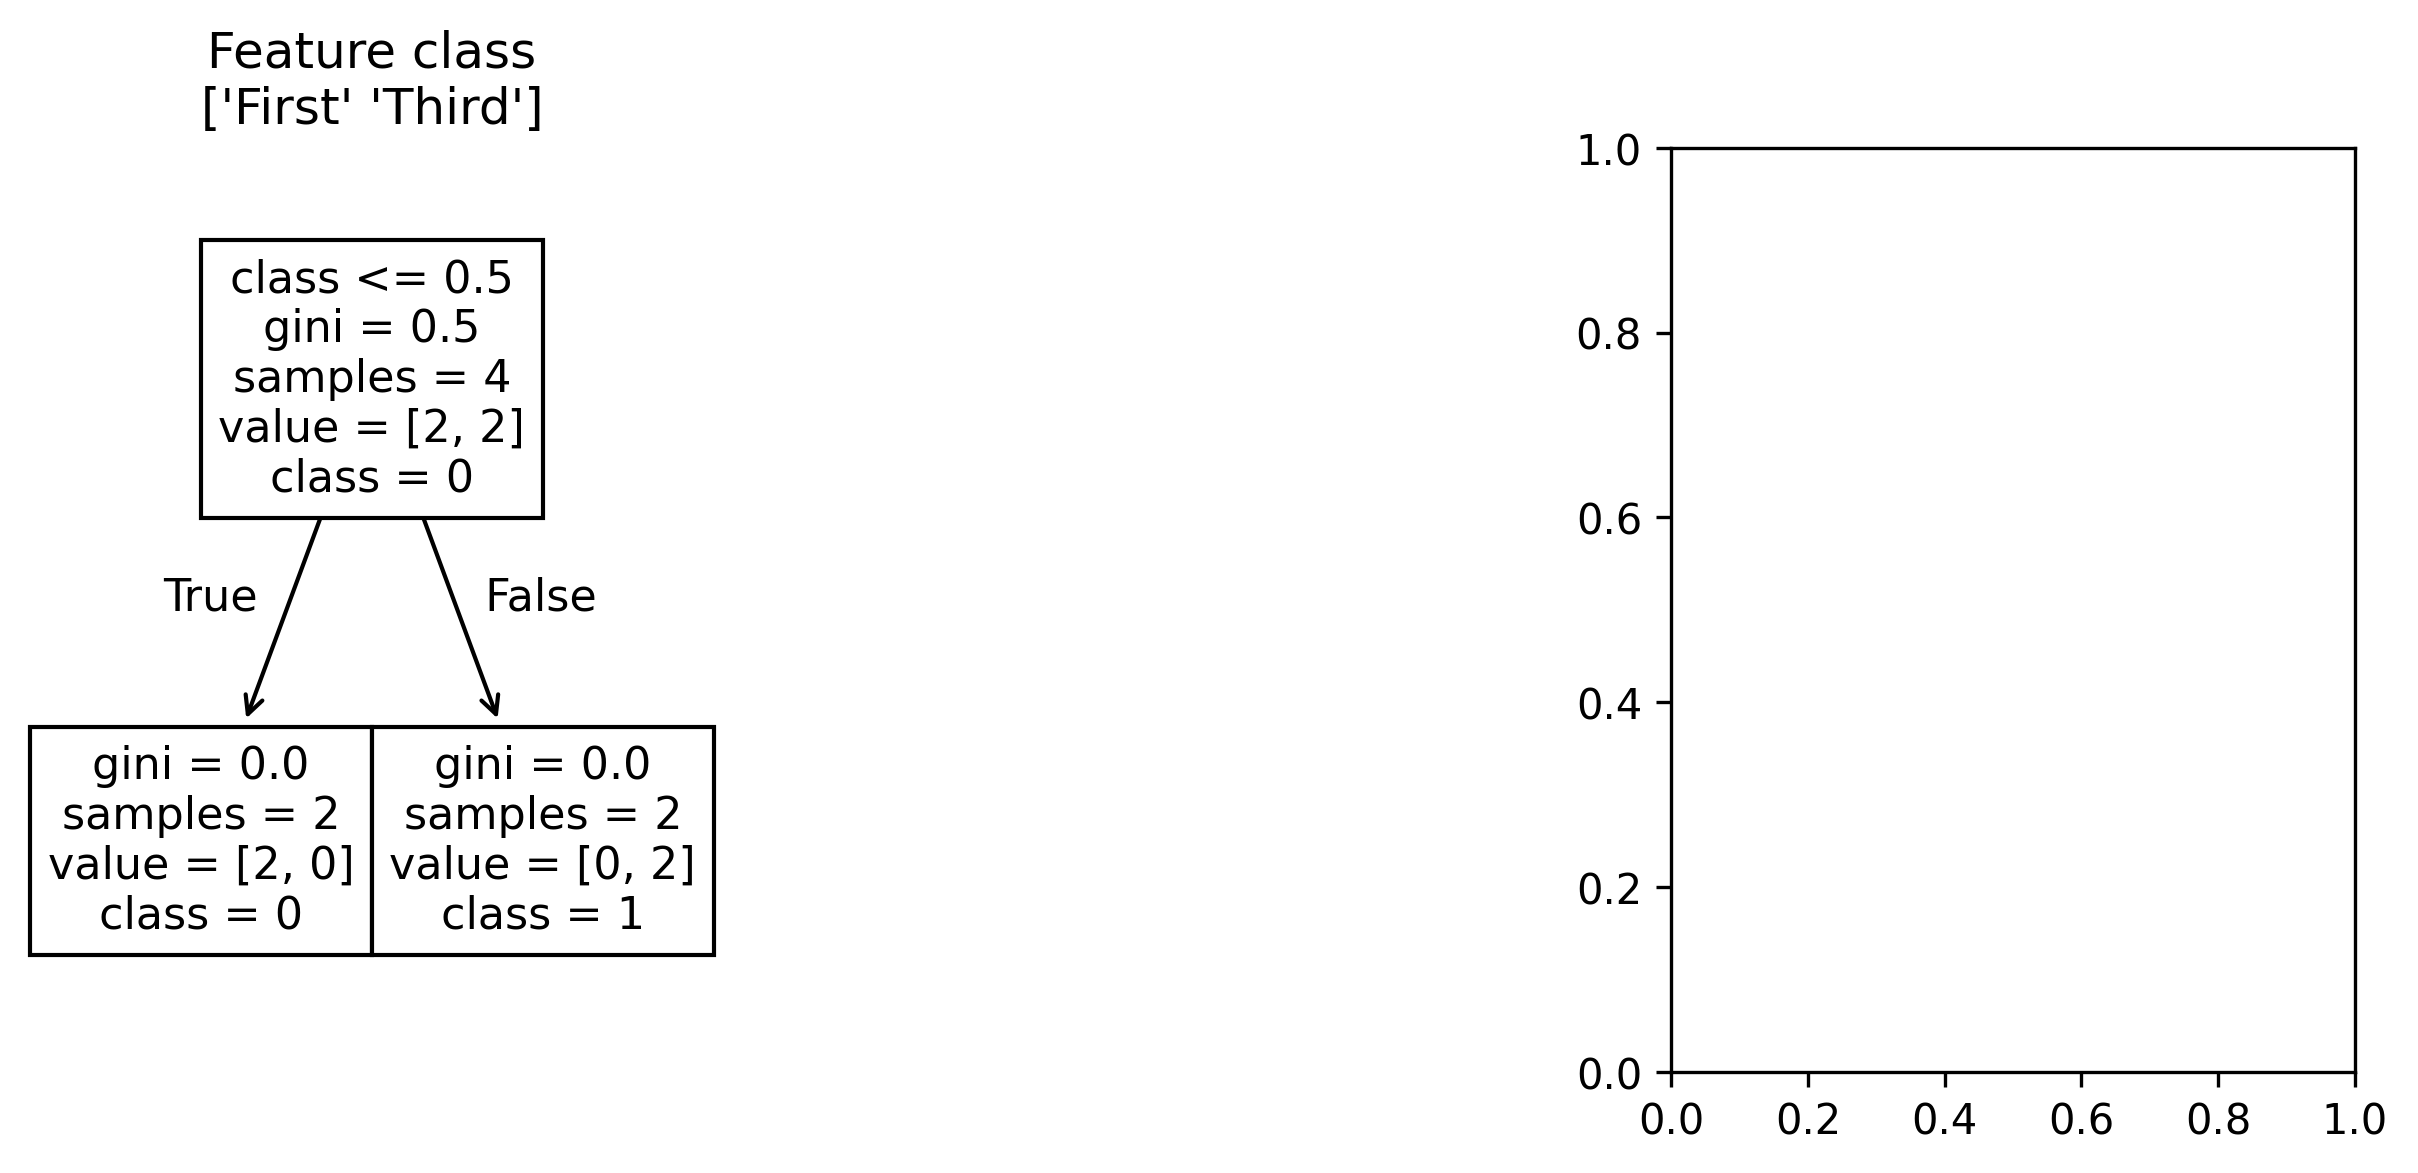

In [125]:
dt = {}

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(10,4), dpi=300)

# Store predictions and probabilities
predictions = {}
probabilities = {}

for i, f in enumerate(X_train.columns):
    print(X_train[f].dtypes=="object", " + ", f)
    str = ""
    
    # print("f: ", f)
    # Determine preprocessing steps
    if X_train[f].dtype == "object":  # Categorical feature
        preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])
    else:  # Numerical feature
        preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
    # print(preprocessor)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=1))
    ])
    print(pipeline)
    dt[f] = pipeline.fit(X_train[f].to_numpy().reshape(-1,1), y_train)

    # # Make predictions
    # predictions[f] = dt[f].predict(X_test[[f]])
    # probabilities[f] = dt[f].predict_proba(X_test[[f]])

    if X_train[f].dtype == "object" : #or X_train[f].dtypes=="category"
        print("type object", dt[f]['preprocessor']['encoder'].categories_[0])
        str = dt[f]['preprocessor']['encoder'].categories_[0]
    else:
        print("else type: ", X_train[f].dtypes)
        str = [f]
    print("str: ", str)
    plot_tree(dt[f]['classifier'], feature_names=[f], class_names=['0', '1'], ax = axis[i])
    axis[i].set_title(f"Feature {f}\n{str}", fontsize = 12)

plt.tight_layout()
plt.show()

# Display predictions
print("\nPredictions:")
for feature, pred in predictions.items():
    print(f"{feature}: {pred}")

# Display prediction probabilities
print("\nPrediction Probabilities:")
for feature, prob in probabilities.items():
    print(f"{feature}:\n{prob}")